In [17]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Done")

Done


In [18]:
#Load Dataset
df=pd.read_csv('./weatherconditions.csv')
df.head()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,15.8263,1015.13
1,9.355556,0.86,14.2646,15.8263,1015.63
2,9.377778,0.89,3.9284,14.9569,1015.94
3,8.288889,0.83,14.1036,15.8263,1016.41
4,8.755556,0.83,11.0446,15.8263,1016.51


In [25]:
#Show Key Statistics
df.describe()

,Temp,Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,10.347325,1003.235956
std,9.551546,0.195473,6.913571,4.192123,116.969906
min,-21.822222,0.000000,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,8.339800,1011.900000
50%,12.000000,0.780000,9.965900,10.046400,1016.450000
75%,18.838889,0.890000,14.135800,14.812000,1021.090000
max,39.905556,1.000000,63.852600,16.100000,1046.380000


In [19]:
for col in df.columns:
    print(col)

Temperature (C)
Humidity
Wind Speed (km/h)
Visibility (km)
Pressure (millibars)


In [20]:
df=df.rename(columns = {'Temperature (C)':'Temp'})
df.head()

,Temp,Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,15.8263,1015.13
1,9.355556,0.86,14.2646,15.8263,1015.63
2,9.377778,0.89,3.9284,14.9569,1015.94
3,8.288889,0.83,14.1036,15.8263,1016.41
4,8.755556,0.83,11.0446,15.8263,1016.51


<AxesSubplot:>

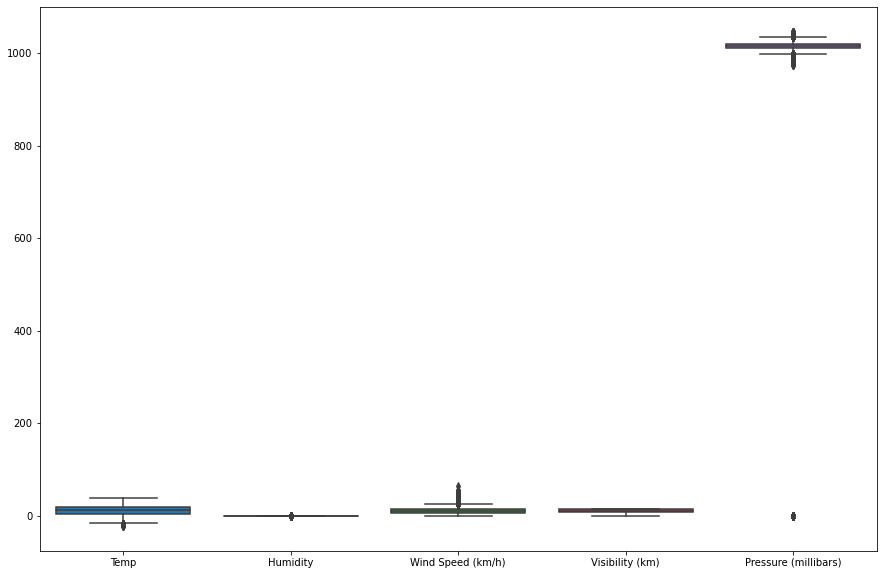

In [21]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

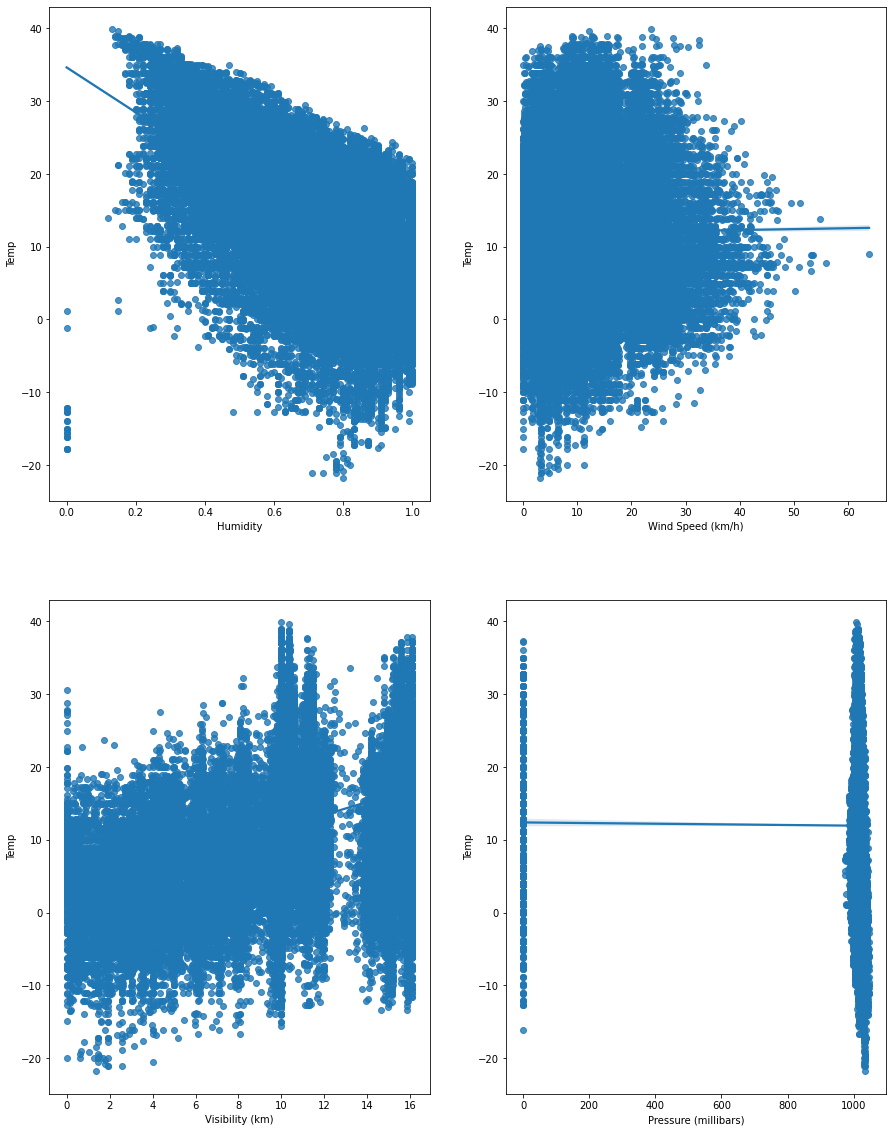

In [24]:
#Scatterplots - Temperature vs. Independent Variables

plt.figure(figsize = (15, 20))

cnt = 1
for col in df.columns:
    if (col == 'Temp'):
        continue
    plt.subplot(round(len(df.columns) / 2), 2, cnt)
    lmgraph = sns.regplot(x = df[col], y = df.Temp)
    lmgraph.set_xlabel(col)
    lmgraph.set_ylabel('Temp')
    cnt += 1    

In [9]:
#Define x and y variable
x = df.drop('Temp',axis=1).to_numpy()
y = df['Temp'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
print("Unstandardized mean: " + str(np.mean(x_train, 0)))
print("Standardized mean: " + str(np.mean(x_train2, 0)))
print("Unstandardized std. dev.: " + str(np.std(x_train, 0)))
print("Standardized std. dev.: " + str(np.std(x_train2, 0)))

Unstandardized mean: [7.35192063e-01 1.08213575e+01 1.03284021e+01 1.00314395e+03]
Standardized mean: [2.56483130e-13 1.10212578e-13 6.30207553e-13 4.37169208e-14]
Unstandardized std. dev.: [  0.19546032   6.92002527   4.19706792 117.45090125]
Standardized std. dev.: [1. 1. 1. 1.]


In [10]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

name = 'Linear Regression'
method = LinearRegression(n_jobs=-1)
method.fit(x_train2,y_train)
predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table = pd.DataFrame(data = np.transpose(method.coef_),
                           index = df.drop('Temp',axis=1).columns,
                           columns = ['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
r2 = metrics.r2_score(y_test, predict)
print('\nR2: {:0.2f}'.format(r2))

n = len(y)
p = x.shape[1]
adjusted_r_squared2 = 1 - ((1-r2)*(n-1)/(n-p-1))
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 

Method: Linear Regression

Intercept: 11.90


                      Coefficients
Humidity                 -5.704935
Wind Speed (km/h)        -1.378157
Visibility (km)           1.796266
Pressure (millibars)     -0.189345

R2: 0.45
Adj_R2: 0.45

Mean Absolute Error: 5.68
Mean Squared Error: 49.69
Root Mean Squared Error: 7.05


In [11]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,22.200000,11.3,-10.9
1,4.811111,13.9,9.1
2,14.422222,4.1,-10.3
3,12.777778,4.9,-7.9
4,21.666667,13.7,-7.9
